In [25]:
import pandas as pd
import numpy as np

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# import hourly smp
hourly_smp = pd.read_csv("data/hourly_smp_v2.csv")
hourly_smp.head()

,datetime,smp
0,2018-02-01 01:00,116.84
1,2018-02-01 02:00,116.84
2,2018-02-01 03:00,116.84
3,2018-02-01 04:00,116.84
4,2018-02-01 05:00,116.84


In [27]:
hourly_smp['datetime'] = hourly_smp['datetime'].str.replace('24:00', '0:00')

hourly_smp.index = pd.to_datetime(hourly_smp['datetime'])
hourly_smp.drop("datetime", axis=1, inplace=True)
hourly_smp.head()

,smp
datetime,
2018-02-01 01:00:00,116.84
2018-02-01 02:00:00,116.84
2018-02-01 03:00:00,116.84
2018-02-01 04:00:00,116.84
2018-02-01 05:00:00,116.84


In [28]:
weather = pd.read_csv("data/weather_v2.csv")
weather.head()

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS


In [29]:
weather.datetime = pd.to_datetime(weather['datetime'])
weather_mean = weather.groupby('datetime').mean().fillna(0)

In [34]:
print(weather_mean.shape)
print(hourly_smp.shape)

(20110, 13)
(20112, 1)


In [58]:
data = pd.concat([weather_mean, hourly_smp], axis=1, sort=False)
data.head()

,temp,prec,ws,wd,humid,vaporP,dew,landP,suntime,rad,snow,C,vis,smp
datetime,,,,,,,,,,,,,,
2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.87
2018-02-01 01:00:00,0.745946,0.030303,2.894444,157.294444,75.324242,5.60,-1.400,977.194118,0.0,0.0,0.0,0.0,1902.75,116.84
2018-02-01 02:00:00,0.610811,0.000000,2.630556,152.016667,74.924242,5.65,-1.275,977.041176,0.0,0.0,0.0,0.0,1829.25,116.84
2018-02-01 03:00:00,0.624324,0.000000,2.894444,168.863889,74.857576,5.60,-1.400,976.894118,0.0,0.0,0.0,9.0,1799.25,116.84
2018-02-01 04:00:00,0.600000,0.000000,3.122857,196.191429,76.915152,5.65,-1.150,976.570588,0.0,0.0,0.0,8.0,1442.50,116.84


In [61]:
data = data.fillna(method='backfill')

In [62]:
data.to_csv("data/hourly_combined.csv")

### Multivariate LSTM Forecast Model

(20109, 56)
train_X shape:  (17520, 39) 17520 (17520,)
(17520, 3, 13) (17520,) (2589, 3, 13) (2589,)
Train on 17520 samples, validate on 2589 samples
Epoch 1/50
 - 1s - loss: 0.0167 - val_loss: 0.0089
Epoch 2/50
 - 1s - loss: 0.0143 - val_loss: 0.0073
Epoch 3/50
 - 1s - loss: 0.0124 - val_loss: 0.0065
Epoch 4/50
 - 1s - loss: 0.0122 - val_loss: 0.0099
Epoch 5/50
 - 1s - loss: 0.0113 - val_loss: 0.0067
Epoch 6/50
 - 1s - loss: 0.0108 - val_loss: 0.0086
Epoch 7/50
 - 1s - loss: 0.0090 - val_loss: 0.0069
Epoch 8/50
 - 1s - loss: 0.0090 - val_loss: 0.0064
Epoch 9/50
 - 1s - loss: 0.0097 - val_loss: 0.0045
Epoch 10/50
 - 1s - loss: 0.0082 - val_loss: 0.0051
Epoch 11/50
 - 1s - loss: 0.0083 - val_loss: 0.0041
Epoch 12/50
 - 1s - loss: 0.0086 - val_loss: 0.0058
Epoch 13/50
 - 1s - loss: 0.0083 - val_loss: 0.0043
Epoch 14/50
 - 1s - loss: 0.0076 - val_loss: 0.0038
Epoch 15/50
 - 1s - loss: 0.0074 - val_loss: 0.0047
Epoch 16/50
 - 1s - loss: 0.0081 - val_loss: 0.0048
Epoch 17/50
 - 1s - loss: 0

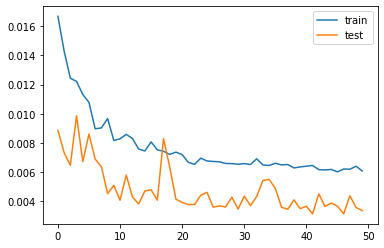

In [101]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = read_csv('data/hourly_combined.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours -----------------------------------------------
n_hours = 3
n_features = 13
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24 * 2
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print("train_X shape: ", train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=30,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [102]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

In [128]:

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -13:]), axis=1)

In [129]:
inv_yhat = scaler.inverse_transform(inv_yhat)

inv_yhat = inv_yhat[:,0]

In [130]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -13:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.480


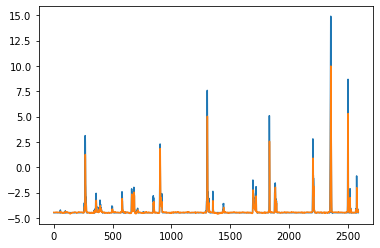

In [132]:
plt.plot(inv_y)
plt.plot(inv_yhat)